# Build a Research Agent which can get information from online archive path and use serach API to create report

## 1. Intall required libs

In [6]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import pandas as pd
import json
import xml.etree.ElementTree as ET

ARXIV_NAMESPACE = '{http://www.w3.org/2005/Atom}'


def extract_from_arxiv (search_query='cat:cs.AI', max_results=50, json_file_path='files/arxiv_dataset.json'):
    """
    Search papers from ARXIV API and save them as JSON

    Args:
        search_query (str): The search query for ArXiv (default is 'cat:cs.AI').
        max_results (int): The maximum number of results to retrieve (default is 100).
        json_file_path (str): File path where JSON data will be saved.

    Returns:
        pd.DataFrame: DataFrame containing the extracted paper information.

    """


## check documentation at https://info.arxiv.org/help/api/user-manual.html#412-python

    url = f'http://export.arxiv.org/api/query?search_query={search_query}&start=0&max_results={max_results}'

    #http://export.arxiv.org/api/query?search_query=cat:cs.AI&start=0&max_results=50

    #response = requests.get(url)
    #print(response.text)

    # with open('files/old_response.txt', 'r', encoding='utf-8') as f:
    #     f.read(old_response)

    old_reponse_file = 'files/old_response.xml'

    #root = ET.fromstring(old_reponse_file)
    tree = ET.parse(old_reponse_file)
    root = tree.getroot()
    print(type(root))

    papers=[]

    ## find all for multiple elements and find for first single element find
    for entry in root.findall(f'{ARXIV_NAMESPACE}entry'):
        title = entry.find(f'{ARXIV_NAMESPACE}title').text.strip()
        summary = entry.find(f'{ARXIV_NAMESPACE}summary').text.strip()

        #Get all authors
        author_elements= entry.findall(f'{ARXIV_NAMESPACE}author')
        authors = [ authors.find(f'{ARXIV_NAMESPACE}name').text    for authors in author_elements]
        #print(f'authors: {authors}')

        #get paper url
        url = entry.find(f'{ARXIV_NAMESPACE}id').text.strip()
        #print(f'url: {url} \n')

        arxiv_id = url.split('/')[-1]
        #print(f'arxiv_id: {arxiv_id} \n')

        ##check for pdf link
        pdf_link_element = entry.find(f'{ARXIV_NAMESPACE}link[@title="pdf"]')
        if pdf_link_element is not None:
            pdf_link = pdf_link_element.attrib.get('href')
            print(f'pdf_link: {pdf_link} \n')
        else:
            pdf_link = None
            print(f'pdf_link NOT found: {pdf_link} \n')


        # pdf_link = entry.find(f'{ARXIV_NAMESPACE}link[@title="pdf"]').attrib.get('href')
        # #print(f'pdf_link: {pdf_link} \n')

        papers.append({
            'title': title,
            'summary': summary,
            'authors': authors,
            'arxiv_id': arxiv_id,
            'url': url,
            'pdf_link': pdf_link
        })

    df = pd.DataFrame(papers)
    
    print(df.head(1))


    # Save the DataFrame to a JSON file.
    with open(json_file_path, 'w', encoding='utf-8') as f:
        json.dump(papers, f, ensure_ascii=False, indent=4)
        print(f'Data saved to {json_file_path} ...')

    return df




In [2]:
df = extract_from_arxiv()

<class 'xml.etree.ElementTree.Element'>
pdf_link: http://arxiv.org/pdf/cs/9308101v1 

pdf_link: http://arxiv.org/pdf/cs/9308102v1 

pdf_link: http://arxiv.org/pdf/cs/9309101v1 

pdf_link: http://arxiv.org/pdf/cs/9311101v1 

pdf_link: http://arxiv.org/pdf/cs/9311102v1 

pdf_link: http://arxiv.org/pdf/cs/9312101v1 

pdf_link: http://arxiv.org/pdf/cs/9401101v1 

pdf_link: http://arxiv.org/pdf/cs/9402101v1 

pdf_link: http://arxiv.org/pdf/cs/9402102v1 

pdf_link: http://arxiv.org/pdf/cs/9402103v1 

pdf_link: http://arxiv.org/pdf/cs/9403101v1 

pdf_link: http://arxiv.org/pdf/cs/9406101v1 

pdf_link: http://arxiv.org/pdf/cs/9406102v1 

pdf_link: http://arxiv.org/pdf/cs/9408101v1 

pdf_link: http://arxiv.org/pdf/cs/9408102v1 

pdf_link: http://arxiv.org/pdf/cs/9408103v1 

pdf_link: http://arxiv.org/pdf/cs/9409101v1 

pdf_link: http://arxiv.org/pdf/cs/9412101v1 

pdf_link: http://arxiv.org/pdf/cs/9412102v1 

pdf_link: http://arxiv.org/pdf/cs/9412103v1 

pdf_link: http://arxiv.org/pdf/cs/950110

In [3]:
df.shape

(50, 6)

## 2.Download PDF files

In [4]:
import requests
import pandas as pd
import json
import os


def download_pdfs(df, download_folder='files'):
    '''
    Download PDF from df and save it in local folder
    '''
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)
    
    pdf_file_names = [] ## empty list for storing pdf file names
    
    for index, row in df.iterrows():
        pdf_link = row['pdf_link']

        try:
            response = requests.get(pdf_link)
            response.raise_for_status()

            file_name = os.path.join(download_folder, pdf_link.split('/')[-1]) + '.pdf'
            pdf_file_names.append(file_name)

            # Save the downloaded PDF
            # with open(file_name, 'wb') as f:
            #     f.write(response.content)
            
            #print(f'PDF downloaded successfully and saved as {file_name}')
        
        except requests.exceptions.RequestException as e:
            print(f'Failed to download the PDF: {e}')
            pdf_file_names.append(None)
    
    df['pdf_file_name'] = pdf_file_names

    return df


        
download_pdfs(df)

,title,summary,authors,arxiv_id,url,pdf_link,pdf_file_name
0,Dynamic Backtracking,Because of their occasional need to return to ...,[M. L. Ginsberg],9308101v1,http://arxiv.org/abs/cs/9308101v1,http://arxiv.org/pdf/cs/9308101v1,files\9308101v1.pdf
1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,[M. P. Wellman],9308102v1,http://arxiv.org/abs/cs/9308102v1,http://arxiv.org/pdf/cs/9308102v1,files\9308102v1.pdf
2,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,"[I. P. Gent, T. Walsh]",9309101v1,http://arxiv.org/abs/cs/9309101v1,http://arxiv.org/pdf/cs/9309101v1,files\9309101v1.pdf
3,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,"[F. Bergadano, D. Gunetti, U. Trinchero]",9311101v1,http://arxiv.org/abs/cs/9311101v1,http://arxiv.org/pdf/cs/9311101v1,files\9311101v1.pdf
4,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,"[J. C. Schlimmer, L. A. Hermens]",9311102v1,http://arxiv.org/abs/cs/9311102v1,http://arxiv.org/pdf/cs/9311102v1,files\9311102v1.pdf
5,Decidable Reasoning in Terminological Knowledg...,Terminological knowledge representation system...,"[M. Buchheit, F. M. Donini, A. Schaerf]",9312101v1,http://arxiv.org/abs/cs/9312101v1,http://arxiv.org/pdf/cs/9312101v1,files\9312101v1.pdf
6,Teleo-Reactive Programs for Agent Control,A formalism is presented for computing and org...,[N. Nilsson],9401101v1,http://arxiv.org/abs/cs/9401101v1,http://arxiv.org/pdf/cs/9401101v1,files\9401101v1.pdf
7,Learning the Past Tense of English Verbs: The ...,Learning the past tense of English verbs - a s...,[C. X. Ling],9402101v1,http://arxiv.org/abs/cs/9402101v1,http://arxiv.org/pdf/cs/9402101v1,files\9402101v1.pdf
8,Substructure Discovery Using Minimum Descripti...,The ability to identify interesting and repeti...,"[D. J. Cook, L. B. Holder]",9402102v1,http://arxiv.org/abs/cs/9402102v1,http://arxiv.org/pdf/cs/9402102v1,files\9402102v1.pdf
9,Bias-Driven Revision of Logical Domain Theories,The theory revision problem is the problem of ...,"[M. Koppel, R. Feldman, A. M. Segre]",9402103v1,http://arxiv.org/abs/cs/9402103v1,http://arxiv.org/pdf/cs/9402103v1,files\9402103v1.pdf


## 3.Splitting pdf into chunks

In [5]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter



def load_pdf_chunks(file_path):
    '''Load pdf file and chunk it'''
    loader = PyPDFLoader(file_path)
    data= loader.load()
    
    # Initialize the RecursiveCharacterTextSplitter
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=512,  # Maximum size of each chunk
        chunk_overlap=50  # Overlap between chunks
    )

    # Split the text
    chunks = splitter.split_documents(data)

    return chunks


### expand DF and append chunk in current DF

In [6]:
df.head(1)

,title,summary,authors,arxiv_id,url,pdf_link,pdf_file_name
0,Dynamic Backtracking,Because of their occasional need to return to ...,[M. L. Ginsberg],9308101v1,http://arxiv.org/abs/cs/9308101v1,http://arxiv.org/pdf/cs/9308101v1,files\9308101v1.pdf


In [7]:
df.count()

title            50
summary          50
authors          50
arxiv_id         50
url              50
pdf_link         50
pdf_file_name    50
dtype: int64

In [8]:
def expand_df(df):
    '''Expand DF to chunks
    return New expanded df
    '''

    expanded_row = []

    ## loop through each row in DF
    for index,row in df.iterrows():
        file_name = row['pdf_file_name']
        #print(row)
        try:
            chunks = load_pdf_chunks(file_name)
        except:
            print(f'PDF file not found for {index} row with filename - {file_name}')
            continue

        #loop over the chunks and add it to new data frame
        #print(f'Adding {len(chunks)} chunks for {index} row')
        for i, chunk in enumerate(chunks):
            prechunk = i-1 if i > 0 else '' # Preceding chunk ID
            postchunk = i+1 if i < len(chunks) -1 else '' # Following chunk ID

            expanded_row.append(
                {
                    'id':"{}#{}".format(row['arxiv_id'],i),
                    'title':row['title'],
                    'summary':row['summary'],
                    'authors':row['authors'],
                    'arxiv_id':row['arxiv_id'],
                    'url':row['url'],
                    'chunk':chunk.page_content,
                    'prechunk_id': '' if i == 0 else "{}#{}".format(row['arxiv_id'],prechunk),
                    'postchunk_id': '' if i == len(chunks) -1 else "{}#{}".format(row['arxiv_id'],postchunk)


                }
            )

    return pd.DataFrame(expanded_row)        



#expand_df(df)

In [9]:
expanded_df = expand_df(df)

## 4.Create embeddings

In [2]:
import os
from semantic_router.encoders import OpenAIEncoder
from dotenv import load_dotenv
from openai import OpenAI


res = load_dotenv(dotenv_path="../ML_practice/cred.env")

print(res)

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

# client = OpenAI(api_key=OPENAI_API_KEY)

# for model in client.models.list():
#     print(model.id)

encoder = OpenAIEncoder(name='text-embedding-3-small')


True


In [2]:
dims = encoder('hello namaste')



### create pinecone index

In [3]:
from pinecone import Pinecone,ServerlessSpec

load_dotenv(dotenv_path="../ML_practice/cred.env")

PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')


pc = Pinecone(api_key=PINECONE_API_KEY)

##define serveless specification
spec = ServerlessSpec(
        cloud='aws',
        region='us-east-1'
)




In [4]:
print(pc.list_indexes().names())

['askdoc', 'askwiki', 'langgraph-research-agent']


In [5]:
import time

index_name = 'langgraph-research-agent'

if index_name not in pc.list_indexes().names():

    index = pc.create_index(
        name = index_name,
        dimension = 1536,
        metric='cosine',
        spec = spec
    )

    print(f'Index {index_name} Created')
else:
    print(f'Index {index_name} already exists')

Index langgraph-research-agent already exists


In [7]:
##get to index in variable

index = pc.Index(index_name)

In [8]:
print(index_name)

langgraph-research-agent


In [75]:
pc.delete_index(index_name)

In [7]:
indexes = pc.list_indexes().names()

In [8]:
print(indexes)

['askdoc', 'askwiki', 'langgraph-research-agent']


In [9]:
print(index.describe_index_stats())

{'dimension': 1536,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 12276}},
 'total_vector_count': 12276,
 'vector_type': 'dense'}


In [9]:
expanded_df.head(1)


NameError: name 'expanded_df' is not defined

In [10]:
## Now from expanded_df, get chunks and upsert into pinecone index

from tqdm import tqdm

def approx_payload_size_bytes(batch_tuples):
    """
    Approximate JSON-serialized size of the upsert payload.
    This is conservative but good for dynamic batching.
    """
    # Represent as list of dicts similar to Pinecone upsert format
    sample = []
    for id, vec, meta in batch_tuples:
        sample.append({"id": id, "values": vec, "metadata": meta})
    return len(json.dumps(sample).encode('utf-8'))/(1024 * 1024)



data = expanded_df
batch_size = 64

len(data) ##12276



##loop through data in batches in data and upsert into index

for i in tqdm(range(0,len(data),batch_size)):
    print("iteration:",i)
    i_end = min(len(data),i+batch_size) ##end point

    #print("i_end:",i_end)

    batch = data[i:i_end].to_dict(orient='records')

    #print("len(batch):",len(batch))

    ##get metadata and ID for each chunk in batch

    metadata= [{'arxiv_id':r['arxiv_id'],'title':r['title'],'chunk':r['chunk']} for r in batch]

    ids = [r['id'] for r in batch]

    chunks = [r['chunk'] for r in batch]

    print("len(chunks) sample:",len(chunks))
    
    embeds = encoder(chunks)## openai encoder function isntead of tiktoken



    batch_tuple = [(ids[j],embeds[j],metadata[j]) for j in range(len(ids))]

    #print("Current batch size:", len(batch_tuple))
    #print("First 3 chunk types:", [type(c) for c in chunks[:3]])
    #print("Any None in chunks?:", any(c is None for c in chunks))

    payload_size = approx_payload_size_bytes(batch_tuple)
    print(f'Payload size: {payload_size} MBs')
    
        
    


    ##upload embeddings , ids and metadata
    index.upsert(vectors=zip(ids,embeds,metadata))

    print(f'--'*20)



NameError: name 'expanded_df' is not defined

In [11]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 12276}},
 'total_vector_count': 12276,
 'vector_type': 'dense'}

## 5.Fetch tool
Fetch tool uses regular expression for searching

In [9]:
import requests


arvix_id = '1706.03762'


res = requests.get(f'https://arxiv.org/abs/{arvix_id}')

print(res.text)

<!DOCTYPE html>
<html lang="en">

<head>  <title>[1706.03762] Attention Is All You Need</title>
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <link rel="apple-touch-icon" sizes="180x180" href="/static/browse/0.3.4/images/icons/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/static/browse/0.3.4/images/icons/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/static/browse/0.3.4/images/icons/favicon-16x16.png">
  <link rel="manifest" href="/static/browse/0.3.4/images/icons/site.webmanifest">
  <link rel="mask-icon" href="/static/browse/0.3.4/images/icons/safari-pinned-tab.svg" color="#5bbad5">
  <meta name="msapplication-TileColor" content="#da532c">
  <meta name="theme-color" content="#ffffff">
  <link rel="stylesheet" type="text/css" media="screen" href="/static/browse/0.3.4/css/arXiv.css?v=20241206" />
  <link rel="stylesheet" type="text/css" media="print" href="/static/browse/0.3.4/css/arXiv-print.css

In [10]:
import re


abstract_pattern = re.compile(
    r'<blockquote class="abstract mathjax">\s*<span class="descriptor">Abstract:</span>\s*(.*?)\s*</blockquote>',
    re.DOTALL
)

abstract = abstract_pattern.search(res.text).group(1)

print(abstract)

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the literature. We show that the Transforme

In [36]:
from langchain_core.tools import tool
from pydantic.v1 import BaseModel, Field # Used for tool schema
import requests
import re
from typing import Optional


# 1. Define the Pydantic Schema for the function's input
class ArxivInput(BaseModel):
    """Input for fetching an arXiv abstract."""
    # Renamed the class for clarity, matching the tool's purpose
    arvix_id: str = Field(description="The arXiv ID (e.g., '2407.03964') for the paper.")


# Regex pattern to find the abstract block
# Note: This pattern is highly specific to a newer arXiv layout.
abstract_pattern = re.compile(
    r'<blockquote class="abstract mathjax">\s*<span class="descriptor">Abstract:</span>\s*(.*?)\s*</blockquote>',
    re.DOTALL
)

@tool(args_schema=ArxivInput) # Use the Pydantic schema
def fetch_arxiv(arvix_id: str) -> str:
    '''fetch arXiv abstract'''
    print('New fetch arXiv abstract function')
    # 1. Fetch the content
    # Note: Older arXiv IDs like 9308101 might redirect or have simpler pages.
    res = requests.get(f'https://arxiv.org/abs/{arvix_id}')
    
    # 2. Safely attempt the regex search
    match = abstract_pattern.search(res.text)
    
    if match:
        # If the expected blockquote structure is found, extract and return
        abstract = match.group(1).strip()
        if abstract:
            return abstract
        else:
            # Found the block, but it was empty
            raise ValueError(f'Found empty abstract block for {arvix_id}')
    
    # 3. Fallback/Error handling: Try a more generic match for older pages
    # Older pages often have the abstract text directly in a div or p tag.
    # This is an example of checking for a different, simpler pattern.
    fallback_pattern = re.compile(
        r'<div id="abstract">\s*<blockquote.*?>(.*?)</blockquote>',
        re.DOTALL
    )
    fallback_match = fallback_pattern.search(res.text)
    
    if fallback_match:
        return fallback_match.group(1).strip()
    
    # If no pattern matches, the error is legitimate
    raise ValueError(f'Could not find abstract content for arXiv ID: {arvix_id}. The page structure may be non-standard.')    

In [37]:
arvix_id = '1706.03762'


res = fetch_arxiv.invoke(input={'arvix_id': arvix_id}) ##invoke fetch_arxiv tool with 

print(res)

New fetch arXiv abstract function
The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being more parallelizable and requiring significantly less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including ensembles by over 2 BLEU. On the WMT 2014 English-to-French translation task, our model establishes a new single-model state-of-the-art BLEU score of 41.8 after training for 3.5 days on eight GPUs, a small fraction of the training costs of the best models from the liter

## 6.Web Search tool 
Utilizes SERP API for google search

In [13]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../ML_practice/cred.env")

SERP_API_KEY = os.getenv('SERP_API_KEY')



In [ ]:
#pip install --upgrade pydantic

In [15]:
import pydantic
pydantic.__version__

'2.12.4'

In [14]:
from serpapi import GoogleSearch
# from pydantic import BaseModel, Field

serp_params = {
  "engine": "google",
  "api_key": SERP_API_KEY
}

# # Define the Pydantic model for the tool's arguments
# class WebSearchArgs(BaseModel):
#     query: str = Field(description="The search query string.")

search = GoogleSearch({**serp_params,'q': 'query', 'num': 5})

results = search.get_dict().get('organic_results', [])

formatted_results = '\n---\n'.join([f"Title: {result['title']}\nSnippet: {result['snippet']}\nLink: {result['link']}" for result in results])



print(formatted_results)



Title: QUERY Definition & Meaning
Snippet: 1 ... to ask questions of especially with a desire for authoritative information ... 2 ... to ask questions about especially in order to resolve a doubt ... 3 ... to put ...
Link: https://www.merriam-webster.com/dictionary/query
---
Title: QUERY | definition in the Cambridge English Dictionary
Snippet: a question, often expressing doubt about something or looking for an answer from an authority. If you have any queries about your treatment, the doctor will ...
Link: https://dictionary.cambridge.org/us/dictionary/english/query
---
Title: Query
Snippet: Computing and technology · Query, a precise request for information retrieval made to a database, data structure or information system · Command-query ...
Link: https://en.wikipedia.org/wiki/Query
---
Title: QUERY Definition & Meaning
Snippet: verb · to express uncertainty, doubt, or an objection concerning (something) · to express as a query · to put a question to (a person); ask.
Link: https://

In [15]:
print(results)

[{'position': 1, 'title': 'QUERY Definition & Meaning', 'link': 'https://www.merriam-webster.com/dictionary/query', 'redirect_link': 'https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.merriam-webster.com/dictionary/query&ved=2ahUKEwjVx-C69fmQAxVFrJUCHZsHEIsQFnoECCIQAQ', 'displayed_link': 'https://www.merriam-webster.com › dictionary › query', 'favicon': 'https://serpapi.com/searches/691b772b7223f464bdc06e63/images/0e8de4fa768bad099d14bcd56778d3a5e7224658273f909cac160e9fcbd8d94c.png', 'snippet': '1 ... to ask questions of especially with a desire for authoritative information ... 2 ... to ask questions about especially in order to resolve a doubt ... 3 ... to put ...', 'snippet_highlighted_words': ['to ask questions of especially with a desire for authoritative information'], 'source': 'Merriam-Webster'}, {'position': 2, 'title': 'QUERY | definition in the Cambridge English Dictionary', 'link': 'https://dictionary.cambridge.org/us/dictionary/english/query', '

In [16]:
from serpapi import GoogleSearch

# Define the 'web_search' tool using the '@tool' decorator.
@tool('web_search')
def web_search(query: str) -> str:
    '''Finds general knowledge information using a Google search.

    Args:
        query (str): The search query string.
    
    Returns:
        str: A formatted string of the top search results, including title, snippet, and link.
    '''

    search = GoogleSearch({
        **serp_params,  
        'q': query,        
        'num': 5         
    })
   
    results = search.get_dict().get('organic_results', [])
    formatted_results = '\n---\n'.join(
        ['\n'.join([x['title'], x['snippet'], x['link']]) for x in results]
    )
    
    
    # Return the formatted results or a 'No results found.' message if no results exist.
    return formatted_results if results else 'No results found.'


In [17]:
output = web_search.invoke(input={'query': 'GenAI in fintech'})

print(output)

Generative AI in Fintech Use Cases: Top 10 Startups of 2025
Within the FinTech industry, GenAI is particularly useful in creating synthetic datasets for risk assessment, enhancing customer service via advanced chatbots, ...
https://www.coherentsolutions.com/insights/generative-ai-in-fintech-technologies-advantages-and-use-cases
---
Generative AI in FinTech: Benefits, Use Cases, Examples & ...
The fusion of Generative AI is helping FinTech companies process and analyze data to unlock new avenues for innovation and operational efficiency.
https://www.rishabhsoft.com/blog/generative-ai-in-fintech
---
The Unstoppable Rise of Generative AI in Financial Services
Gen AI is reshaping financial services, with insights from Google Cloud highlighting how AI is accelerating innovation in banking and risk ...
https://fintechmagazine.com/news/the-unstoppable-rise-of-generative-ai-in-financial-services
---
GenAI in banking: game-changer or world-ender?
GenAI has the potential to transform the custome

## 7.Create a RAG tool

In [18]:
def format_rag_text(matches: list) -> str:
    '''Formats the input text for the RAG tool and returns the formatted text as a string.'''
    formatted_text = []


    for x in matches:
        text = (
            f"Title: {x['metadata']['title']}\n"
            f"Chunk: {x['metadata']['chunk']}\n"
            f"ArXiv ID: {x['metadata']['arxiv_id']}\n"
        )

        formatted_text.append(text)

    formatted_text = '\n---\n'.join(formatted_text)

    return formatted_text

In [19]:
from langchain_core.tools import tool
from pydantic.v1 import BaseModel, Field # <-- New Import


class WebSearchArgs(BaseModel):
    arvix_id: str = Field(..., description="The arvix id string.")

@tool('rag_search_filter')
def rag_search_filter(query:str, arvix_id:str) -> str:
    '''RAG serach filter based on arvix id'''

    query_encode = encoder([query])

    input_vector = index.query(vector=query_encode, top_k=5, include_metadata=True, filter={'arxiv_id': arvix_id})

    matches = input_vector['matches']

    formatted_text = format_rag_text(matches)

    return formatted_text




rag_search_filter.invoke(input={'query': 'Attention', 'arvix_id': '1706.03762'})

''

In [20]:
from langchain_core.tools import tool

@tool('rag_search')
def rag_search(query:str) -> str:
    '''RAG search without filter'''

    query_encode = encoder([query])

    input_vector = index.query(vector=query_encode, top_k=5, include_metadata=True)

    matches = input_vector['matches']

    formatted_text = format_rag_text(matches)

    return formatted_text

In [28]:
help(rag_search)

Help on StructuredTool in module langchain_core.tools.structured object:

class StructuredTool(langchain_core.tools.base.BaseTool)
 |  StructuredTool(
 |      *,
 |      name: str,
 |      description: str = '',
 |      args_schema: Annotated[type[pydantic.main.BaseModel] | dict[str, Any], SkipValidation()],
 |      return_direct: bool = False,
 |      verbose: bool = False,
 |      callbacks: list[langchain_core.callbacks.base.BaseCallbackHandler] | langchain_core.callbacks.base.BaseCallbackManager | None = None,
 |      tags: list[str] | None = None,
 |      metadata: dict[str, typing.Any] | None = None,
 |      handle_tool_error: bool | str | collections.abc.Callable[[langchain_core.tools.base.ToolException], str] | None = False,
 |      handle_validation_error: bool | str | collections.abc.Callable[[pydantic_core._pydantic_core.ValidationError | pydantic.v1.error_wrappers.ValidationError], str] | None = False,
 |      response_format: Literal['content', 'content_and_artifact'] = 'c

## 8.Final answer tool
This is final answer tool, which combines list and iterate over the list of tools 

In [21]:
from langchain_core.tools import tool



@tool
def final_answer(
    introduction: str,
    research_steps: str or list,
    main_body: str,
    conclusion: str,
    sources: str or list

) -> str:

    '''Returns a natural language response in the form of a research report.'''

    # Format research steps if given as a list.
    if isinstance(research_steps, list):
        research_steps = '\n'.join([f'- {r}' for r in research_steps])
    
    # Format sources if given as a list.
    if isinstance(sources, list):
        sources = '\n'.join([f'- {s}' for s in sources])
    
    # Construct and return the final research report.
    return f'{introduction}\n\nResearch Steps:\n{research_steps}\n\nMain Body:\n{main_body}\n\n \
    Conclusion:\n{conclusion}\n\nSources:\n{sources}'


## 9.Initialize agent LLM

In [22]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Define the system prompt 
system_prompt = (
    '''You are the Agent LLM, the great AI decision-maker.
    Given the user's query, you must decide what to do with it based on the
    list of tools provided to you.

    If you see that a tool has been used (in the scratchpad) with a particular
    query, do NOT use that same tool with the same query again. Also, do NOT use
    any tool more than twice (i.e., if the tool appears in the scratchpad twice, do
    not use it again).

    You should aim to collect information from a diverse range of sources before
    providing the answer to the user. Once you have collected plenty of information
    to answer the user's question (stored in the scratchpad), use the final_answer tool.'''
)


messages = [('system', system_prompt),

    ## Insert past chat messages to maintain context
    MessagesPlaceholder(variable_name='chat_history'),

    ('human', '{input}'),

    #scratchpad to track tool usage and intermediate steps
    ('assistant', 'scratchpad: {scratchpad}'),
    ]

## create a prompt 

prompt = ChatPromptTemplate.from_messages(messages)

### create scratch pad ( trail of messages)

In [33]:
from langchain_core.messages import ToolCall, ToolMessage
from langchain_openai import ChatOpenAI
import os

llm = ChatOpenAI(model = 'gpt-4o-mini', temperature = 0,  openai_api_key = os.getenv('OPENAI_API_KEY'))

tools = [
    rag_search_filter,
    rag_search,
    fetch_arxiv,
    web_search,
    final_answer

]

def create_scratchpad(intermediate_steps: list[ToolCall]) -> str:
    '''Create a scratchpad from the intermediate tool calls'''
    print('NEW create_scratchpad')
    print(f'intermediate_steps', intermediate_steps)

    research_steps = []

    # Iterate over the objects as a single variable
    for action_obj in intermediate_steps:
        # Check if the log property is not 'TBD' (meaning the action has been executed)
        log_str = action_obj.log
        if log_str != 'TBD':
            research_steps.append(
                f'Tool: {action_obj.tool}, input: {action_obj.tool_input}\n'
                f'Output: {log_str}'
            )
    
    # Join the research steps into a readable log.
    return '\n---\n'.join(research_steps)


#define orchestrator for decision making pipeline

orchestrator = (
    {
        'input': lambda x: x['input'],
        'chat_history': lambda x: x['chat_history'],
        'scratchpad': lambda x: create_scratchpad(intermediate_steps=x['intermediate_steps']),
    }
    | prompt
    | llm.bind_tools(tools, tool_choice='any')
)





In [32]:
type(orchestrator)

langchain_core.runnables.base.RunnableSequence

## 10.Test orchestrator agent tool

In [31]:
#input = 'Tell me something interesting about dynamic backtracking AI and LLMs'
input = 'What is the ArXiv paper with the ID 2407.21783 all about?'

input = {

    'input': input,
    'chat_history': [],
    'intermediate_steps': []
}

output = orchestrator.invoke(input)



print(output)

create_scratchpad
intermediate_steps []
content='' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 382, 'total_tokens': 404, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CczQPvP8w6ydFRd8C0s1iL6UB6thd', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None} id='lc_run--c8067180-a2cb-469d-89da-5ac42daad5a8-0' tool_calls=[{'name': 'fetch_arxiv', 'args': {'arvix_id': '2407.21783'}, 'id': 'call_BQrSgx4YE0WHb6P9XL7Hvy1v', 'type': 'tool_call'}] usage_metadata={'input_tokens': 382, 'output_tokens': 22, 'total_tokens': 404, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [31]:
output.tool_calls[0]['name']

'fetch_arxiv'

In [32]:
output.tool_calls[0]['args']

{'arvix_id': '2407.21783'}

## 11.Create run tools ( decision making nodes ) for Langgraph

In [ ]:
# run_orchestrator(): main function that executes the orchestrator and processes its output to extract the relevant tool and its arguments.
# We'll use this information to update the state for future steps.
def run_orchestrator(state: dict) -> dict:
    '''Runs the orchestrator and processes the output to extract tool information.

    Args:
        state (dict): The current state containing the 'intermediate_steps'.

    Returns:
        dict: A new state with updated 'intermediate_steps' including the tool action.
    '''
    
    print('run_orchestrator')
    print(f'intermediate_steps: {state["intermediate_steps"]}')
    
    # Invoke the oraorchestratorcle with the current state.
    out = orchestrator.invoke(state)

    # Extract the tool name and its arguments from the orchestrator's response.
    tool_name = out.tool_calls[0]['name']
    tool_args = out.tool_calls[0]['args']

    # Create an AgentAction object, which records the tool used and the input provided.
    action_out = AgentAction(
        tool=tool_name,
        tool_input=tool_args,
        log='TBD'  # To be determined later after the tool runs.
    )

    # Return a new state with updated 'intermediate_steps'.
    return cast(AgentState,{
        'intermediate_steps': [action_out]
    })


# The router() function determines the next tool to use based on the current state.
def router(state: dict) -> str:
    '''Determines the next tool to use based on the current state.

    Args:
        state (dict): The current state containing 'intermediate_steps'.

    Returns:
        str: The name of the tool to use next.
    '''

    if isinstance(state['intermediate_steps'], list):
        return state['intermediate_steps'][-1].tool
    else:
        print('Router invalid format')
        return 'final_answer'


tool_str_to_func = {
    'rag_search_filter': rag_search_filter,
    'rag_search': rag_search,
    'fetch_arxiv': fetch_arxiv,
    'web_search': web_search,
    'final_answer': final_answer
}

# The run_tool() function executes the appropriate tool based on the current state.
def run_tool(state: dict) -> dict:
    '''Executes the appropriate tool based on the current state.

    Args:
        state (dict): The current state containing the 'intermediate_steps'.

    Returns:
        dict: A new state with updated 'intermediate_steps' including the tool's result.
    '''

    tool_name = state['intermediate_steps'][-1].tool
    tool_args = state['intermediate_steps'][-1].tool_input

    print(f'{tool_name}.invoke(input={tool_args})')

    out = tool_str_to_func[tool_name].invoke(input=tool_args)

    observation = str(out)

    action_out = AgentAction(
        tool=tool_name,
        tool_input=tool_args,
        log=str(out)
    )

    return {'intermediate_steps': [(action_out, observation)]}

## 12. Define langgraph agent state

In [26]:
from typing import TypedDict, Annotated, List
from langchain_core.agents import AgentAction
from langchain_core.messages import BaseMessage
import operator

class AgentState(TypedDict):
    '''Represents the state of an agent., this will be parameter to StateGraph instance'''
    
    input: str
    chat_history: List[BaseMessage]
    intermediate_steps: Annotated[List[tuple[AgentAction, str]], operator.add]

## 13. Define a graph

In [ ]:
from langgraph.graph import StateGraph, END

possible_next_nodes = [
    'rag_search_filter',
    'rag_search',
    'fetch_arxiv',
    'web_search',
    'final_answer',
]

# Initialize the state graph with AgentState to manage the workflow.
graph = StateGraph(AgentState)

graph.add_node('orchestrator', run_orchestrator)
graph.add_node('rag_search_filter', run_tool)
graph.add_node('rag_search', run_tool)
graph.add_node('fetch_arxiv', run_tool)
graph.add_node('web_search', run_tool)
graph.add_node('final_answer', run_tool)

# Set the entry point to 'oracle'.
graph.set_entry_point('orchestrator')

# # Add conditional edges to determine the next step using the router function.
# graph.add_conditional_edges(source='orchestrator', 
#                             path=router,
#                             nodes=possible_next_nodes 
#                             

graph.add_conditional_edges(
    'orchestrator',              # Positional: 1st argument (source)
    router,                      # Positional: 2nd argument (path function)
    possible_next_nodes          # Positional: 3rd argument (destinations)
)

# Add edges from each tool back to 'orchestrator', except 'final_answer', which leads to 'END'.
for tool_obj in tools:
    if tool_obj.name != 'final_answer':
        graph.add_edge(tool_obj.name, 'orchestrator')

graph.add_edge('final_answer', END)

# Compile the graph to make it executable.
runnable = graph.compile()


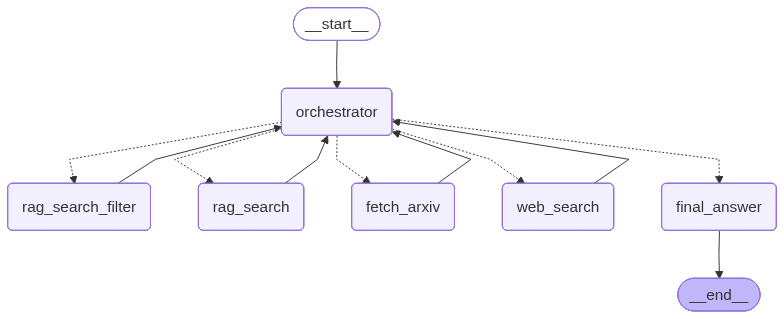

In [52]:
runnable






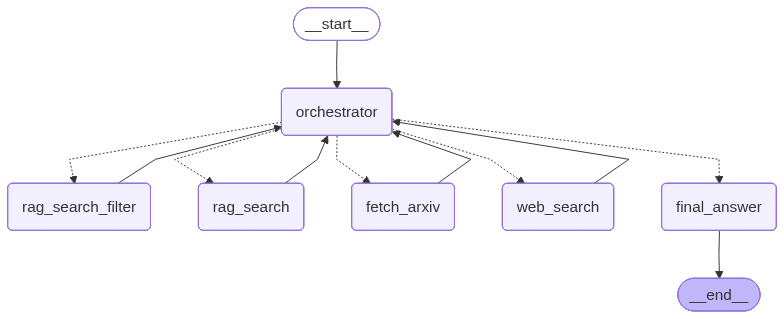

In [53]:
from IPython.display import Image,display

display(Image(runnable.get_graph().draw_mermaid_png()))

## 14. Debug and run

In [38]:
# Run the graph with input.
output = runnable.invoke({
    'input': 'Tell me something interesting about Dynamic Backtracking AI and LLMs',
    'chat_history': [],
})

#print("Output:", output)

run_orchestrator
intermediate_steps: []
NEW create_scratchpad
intermediate_steps []
web_search.invoke(input={'query': 'Dynamic Backtracking AI interesting facts'})
run_orchestrator
intermediate_steps: [AgentAction(tool='web_search', tool_input={'query': 'Dynamic Backtracking AI interesting facts'}, log='TBD'), AgentAction(tool='web_search', tool_input={'query': 'Dynamic Backtracking AI interesting facts'}, log='Dynamic Backtracking\nIn this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding this di culty. The technique developed is.\nhttps://jair.org/index.php/jair/article/download/10107/23929\n---\nA Gentle Introduction to Backtracking\nBacktracking is a versatile technique for exploring the solution space of various types of data science problems and incrementally constructing candidate ...\nhttps://towardsdatascience.com/a-gentle-introduction-to-backtracking/\n---\nGSAT and Dynamic Backtracking\n3 DYNAMIC BACKTRACKING Dynam

In [39]:
print("Output:", output)

Output: {'input': 'Tell me something interesting about Dynamic Backtracking AI and LLMs', 'chat_history': [], 'intermediate_steps': [AgentAction(tool='web_search', tool_input={'query': 'Dynamic Backtracking AI interesting facts'}, log='TBD'), AgentAction(tool='web_search', tool_input={'query': 'Dynamic Backtracking AI interesting facts'}, log='Dynamic Backtracking\nIn this paper, we present a method by which backtrack points can be moved deeper in the search space, thereby avoiding this di culty. The technique developed is.\nhttps://jair.org/index.php/jair/article/download/10107/23929\n---\nA Gentle Introduction to Backtracking\nBacktracking is a versatile technique for exploring the solution space of various types of data science problems and incrementally constructing candidate ...\nhttps://towardsdatascience.com/a-gentle-introduction-to-backtracking/\n---\nGSAT and Dynamic Backtracking\n3 DYNAMIC BACKTRACKING Dynamic backtracking uses the set of nogoods to both record information ab

## 15. Create report in readable format

In [40]:
def build_report(output: dict) -> str:
    '''Builds a formatted report based on the oracle's output.

    Args:
        output (dict): A dictionary containing the various sections of the report (graph's output).

    Returns:
        str: A formatted string containing the full research report.
    '''
    research_steps = output['research_steps']
    if isinstance(research_steps, list):
        research_steps = '\n'.join([f'- {r}' for r in research_steps])
    
    sources = output['sources']
    if isinstance(sources, list):
        sources = '\n'.join([f'- {s}' for s in sources])
    
    return f"""
        INTRODUCTION
        ------------
        {output['introduction']}
        
        RESEARCH STEPS
        --------------
        {research_steps}
        
        REPORT
        ------
        {output['main_body']}
        
        CONCLUSION
        ----------
        {output['conclusion']}
        
        SOURCES
        -------
        {sources}
    """


In [41]:
report = build_report(
    output=output['intermediate_steps'][-1].tool_input
)

print(report)


        INTRODUCTION
        ------------
        Dynamic Backtracking AI is a sophisticated problem-solving technique that enhances traditional backtracking methods by allowing the search process to move deeper into the search space, thereby avoiding unnecessary backtracking to shallow points. This approach is particularly useful in various AI applications, including constraint satisfaction problems, planning, and scheduling.
        
        RESEARCH STEPS
        --------------
        1. Dynamic Backtracking allows for the recording of 'nogoods'—information about portions of the search space that have been eliminated, which helps in avoiding redundant searches. 2. It has been applied in fields such as propositional theorem proving, map coloring, and scheduling problems, showcasing its versatility in handling complex decision-making tasks. 3. Recent advancements have explored the integration of dynamic backtracking with large language models (LLMs), enhancing their reasoning capabi